In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_excel('sales_data_sample.xlsx')
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


#### Câu 1: Mức độ ổn định tăng dần của giá trị đơn hàng 

In [3]:
# Small , Medium, Large
# Xét r --> slot 4: CT 5: suy diễn tuyến tính 

In [4]:
# Câu 1
deal_size_stats = df.groupby('DEALSIZE')['SALES'].agg(['mean', 'std']).reset_index()
deal_size_stats

# Độ lệch chuẩn thể hiện mức độ biến động (hay mức độ không ổn định) của doanh số trong từng nhóm kích thước.

,DEALSIZE,mean,std
0,Large,8293.753248,1294.739895
1,Medium,4398.433699,1047.090148
2,Small,2061.682800,577.183322


Nhóm Large: Tỷ lệ là  1294.74 /8293.75≈ 0.156

Nhóm Medium: Tỷ lệ là 1047.09/4398.43≈0.238

Nhóm Small: Tỷ lệ là  577.18 / 2061.68≈0.28

--> Nhóm Large có tỷ lệ độ lệch chuẩn so với trung bình thấp nhất (0.156), cho thấy doanh số trong nhóm này biến động ít nhất so với giá trị trung bình của nó, nghĩa là doanh số của nhóm Large ổn định hơn so với các nhóm khác.

#### Câu 2: Hồi quy tuyến tính phân tích ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động đến lợi nhuận. Lần lượt tương ứng 50, 2000, 0 01

In [5]:
# lượng mua hàng: OrderQuantity : 50
# Price : 2000
# Discount: 001
# Profit
import statsmodels.api as sm

# Giả sử df có cột dữ liệu M0, M1, M2, M3
X_with_constant = sm.add_constant(df[["QUANTITYORDERED", "SALES", "Discount"]].values)  # Thêm biến M0 vào
y = df[['Profit']].values

# Thực hiện hồi quy tuyến tính
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
F_x =   54.7781  +  0.3367  * 50 +  -0.0013  * 2000 + -238.6262 * 0.01


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.74e-40
Time:                        07:06:37   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

In [6]:
print(f'F_x của phương tình hồi quy tuyến tính: {F_x}')

F_x của phương tình hồi quy tuyến tính: 66.626838


#### Câu 3: Hãy cho biết giá trị độ lệch của mặt hàng sản phẩm 

In [7]:
skew_sales= df['SALES'].skew()
print(f'Skew: {skew_sales}')

Skew: 1.161076000881289


#### Câu 4: Hãy cho biết giá trị độ lệch SALES khi đưa vào hàm transform = 1 / (log_x ^2 + 1)

In [8]:
skew_sales= df['SALES']
trasform = 1 / (np.log(df['SALES'])**2 + 1)
print(f'Transform: {trasform.skew()}')


Transform: 0.7679976616615047


#### Câu 5: Hãy cho biết đơn hàng đặt nhiều nhất


In [9]:
df['ORDERNUMBER'].value_counts().head(1)

ORDERNUMBER
10332    18
Name: count, dtype: int64

#### Caau 6: Dựa vào biểu đồ scatter cho biết sự tương quan 


<img src='./image.png'></img>

In [10]:
# Hướng lên --> Tuong quan thuan
#  xuống    --> Tuong quan Nghich
# Phan tan --> khong

#### Câu 7: Hãy cho biết trung bình doanh số bán hàng của Hold có màu gì 

In [11]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


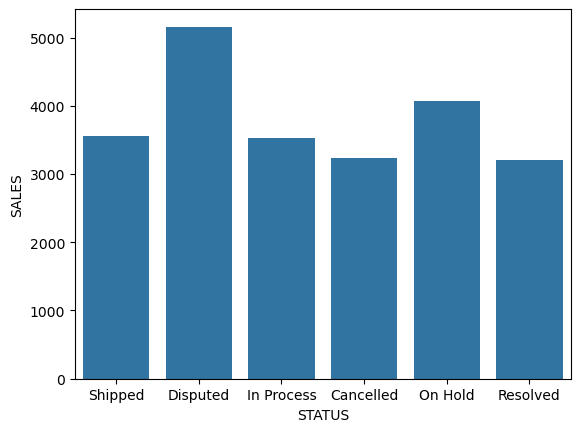

In [12]:
import numpy as np
sns.barplot(x='STATUS', y='SALES', data=df, errorbar=None, estimator=np.mean)
plt.show()

#### Câu 8: Biểu đồ nào phù hợp định tính 
##### a: Hist
##### b: Pie 
##### c: Scatter
##### e. Bar
##### f: Line
##### g: Box anf Whisker
##### h: Stem anf Leaf

In [13]:
# Hist (Histogram): Thường dùng cho dữ liệu định lượng (hiển thị phân bố tần suất), không phù hợp cho phân tích định tính.

# Pie (Biểu đồ tròn): Phù hợp. Biểu đồ này giúp bạn hiểu phân bổ tỷ lệ giữa các nhóm trong một tổng thể, rất hữu ích khi bạn muốn biểu diễn phần trăm hay các danh mục.

# Scatter (Biểu đồ phân tán): Dùng để hiển thị mối tương quan giữa hai biến định lượng, nên không phù hợp cho định tính.

# Bar (Biểu đồ cột): Phù hợp. Dùng để hiển thị sự so sánh giữa các danh mục, rất hữu ích cho dữ liệu định tính như so sánh các nhóm, phân loại.

# Line (Biểu đồ đường): Thường dùng cho dữ liệu định lượng hoặc dữ liệu có tính thời gian, không phù hợp cho định tính.

# Box and Whisker (Biểu đồ hộp): Chủ yếu để phân tích dữ liệu định lượng và tìm hiểu sự phân phối của dữ liệu, không phù hợp cho định tính.

# Stem and Leaf (Biểu đồ thân lá): Cũng là dạng biểu đồ định lượng, hiển thị phân phối dữ liệu số, không phù hợp cho định tính.

In [14]:
#  b, e

#### Câu 9: Hồi quy tuyến tính phân tích ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động đến lợi nhuận. 
#### Hãy cho biết có ý nghĩa hay không ?

  Prob (F-statistic) =  3.74e-40 > 5% ==> Mo hinh ko y nghi


In [15]:
# lượng mua hàng: OrderQuantity : 50
# Price : 2000
# Discount: 001
# Profit
import statsmodels.api as sm

# Giả sử df có cột dữ liệu M0, M1, M2, M3
X_with_constant = sm.add_constant(df[["QUANTITYORDERED", "SALES", "Discount"]].values)  # Thêm biến M0 vào
y = df[['Profit']].values

# Thực hiện hồi quy tuyến tính
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
F_x =   54.7781  +  0.3367  * 50 +  -0.0013  * 2000 + -238.6262 * 0.01
# R-squared:  0.064 =  0.064 * 100% = 6.4% > 5% moi chap nhan
#  Adj. R-squared =  -0.010
#   Prob (F-statistic) =  3.74e-40 > 5% ==> Mo hinh ko y nghi
#   Prob (F-statistic) < 5% ==> Mo hinh co y nghia


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.74e-40
Time:                        07:06:38   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

#### Câu 10: Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng , nếu dữ liệu thiếu trên nhóm DELSALES = MEdium thì dữ liệu thiếu có thể thay thế bằng ?

In [16]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


#### Câu 11 : Hãy cho biết mối tương quan giữu ORDERQUANTY va SALES 

In [17]:
# Cau 3: M2 va M3 co tuong quan khong
from scipy.stats.stats import pearsonr

pearsonr(df['QUANTITYORDERED'], df['SALES'])
#  p < 0.05 --> r = 0.5514261919183585 > 0 tương quan thuận 

C:\Users\admin\AppData\Local\Temp\ipykernel_22596\280123026.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.551426191918357, pvalue=2.3595947970397314e-224)

#### Câu 12: delimiter = coman , Tab, Space, Pipe   , Colon, Slash

#### Câu 13: Hãy cho biết biến DELSIZE thuộc thang đo nào ?

In [18]:
df['DEALSIZE'].value_counts()
# --> Phan loai

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

#### Câu 14: Nếu sử dụng One HOt Coding để số hóa dữ liệu DEALSIZE  thì kết quá cuối cùng là ?

In [19]:
import pandas as pd

# Giả sử dữ liệu
data = {'DEALSIZE': ['Small', 'Medium', 'Large', 'Small', 'Medium']}
a = pd.DataFrame(data)

# Áp dụng One-Hot Encoding
df_encoded = pd.get_dummies(a, columns=['DEALSIZE'])

# Hiển thị kết quả
print(df_encoded)


   DEALSIZE_Large  DEALSIZE_Medium  DEALSIZE_Small
0           False            False            True
1           False             True           False
2            True            False           False
3           False            False            True
4           False             True           False


#### Câu 15: Có mối quan hệ nào giữua trạng thái giao hàng và đặt hàng không ?


In [20]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


In [21]:
# QUANTITYORDERED co phu thuoc STATUS
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('QUANTITYORDERED ~ STATUS', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# p_value = 4.252819e-07 < 0.05 --> reject --> Phu thuoc

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,3562.031394,712.406279,7.594977,4.252819e-07
Residual,2817.0,264233.652630,93.799664,NaN,NaN


#### Cau 16:

Trong đó:
- Z là giá trị sau chuẩn hóa (0.25)

- X là giá trị trước chuẩn hóa
- μ là giá trị trung **bình**

- σ là độ lệch chuẩn

In [22]:
# z = 0.25 
#  u = 
mean_sales = df['SALES'].mean()

# o = 
std_sales = df['SALES'].std()
# X = Z * o + u 
x = 0.25 * std_sales + mean_sales
print(f'Gia tri SALES truoc chuan hoa: {x}') 


Gia tri SALES truoc chuan hoa: 4014.355348344361


#### Câu 17: Nếu sử dụng Min MAX scalar cho SALES có index từ 50 đến 59 thành bao nhiêu ?


X = X −X _min /  X_max−X _min
​
 
​
 
X: Giá trị gốc của dữ liệu.
X_{\min}: Giá trị nhỏ nhất trong tập dữ liệu.
X_{\max}: Giá trị lớn nhất trong tập dữ liệu.

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder, LabelBinarizer
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[['SALES']])

scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns)

scaled_df[50:60]


,SALES
50,0.571492
51,0.142230
52,0.268965
53,0.846934
54,0.251044
55,0.169972
56,0.207757
57,0.346367
58,0.333417
59,0.233724


####  Câu 18: Hồi quy tuyến tính phân tích ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động đến lợi nhuận. Hãy cho biết thứ tự mức độ tác động từ cao đến thấp phụ thuộc 

In [24]:
unique_countries = df['COUNTRY'].nunique()
print(unique_countries)

19


#### Câu 19: Hãy cho biết có bao nhêu đơn hàng đặt hàng công ty ABC


unique_countries = df['COUNTRY'].nunique()
print(unique_countries)